In [30]:
from nav_sim_modules.scener import ChestSearchRoomScener
import numpy as np

In [31]:
np.random.seed(1)
test = ChestSearchRoomScener()


In [32]:
test.generate_scene()

In [33]:
test.components_info

{'obstacle': (array([1.2956615 , 3.34340651, 5.42579349]),
  array([-2.4146797 , -2.36619222,  4.69430373]),
  array([3.02504727, 1.34876931, 3.49496047]),
  array([-3.17555918,  1.73803206,  0.85737347]),
  array([1.7462867 , 2.85024222, 0.37647395]),
  array([ 1.44325649, -2.45158384,  0.76242342]),
  array([-3.44526259, -1.64219125,  0.27992771]),
  array([2.50581689, 0.30011033, 0.67540553]),
  array([0.30771665, 2.31263685, 1.4181736 ]),
  array([-2.75932248, -1.42333144,  4.47984189])),
 'key': (array([1.56095548, 1.29534424, 0.        ]),
  array([-3.20613955, -3.29303293,  0.        ]),
  array([ 3.03579596, -0.89132858,  0.        ]),
  array([-2.42872493,  2.77677063,  0.        ]),
  array([ 0.17159014, -2.3584871 ,  0.        ])),
 'chest': (array([1.11650565, 3.78583855, 0.        ]),
  array([-2.72661316, -2.81233705,  0.        ]),
  array([2.15586747, 0.91606871, 0.        ]),
  array([-3.47493275,  2.09160039,  0.        ]),
  array([ 1.82127428, -2.71310334,  0.      

In [34]:
test.spawn()

(-0.8754570227594218, -0.23938152415246572, 0.3829523226730926)

/home/tagokeniot/hypo_workspace/nav-sim-modules/.venv/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/tagokeniot/hypo_workspace/nav-sim-modules/.venv/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/tagokeniot/hypo_workspace/nav-sim-modules/.venv/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


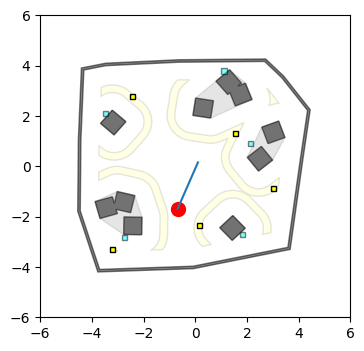

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(0, figsize=(4,4), dpi=100)

ax = fig.add_subplot(111)
plt.xlim(-6,6)
plt.ylim(-6,6)

wall = unary_union(test.room_config.polygons[test.room_config.tag_wall])
obstacles = unary_union(test.room_config.polygons[test.room_config.tag_obstacle])
targets = unary_union(test.room_config.polygons[test.room_config.tag_target])
keys = unary_union(test.room_config.polygons[test.room_config.tag_key])
obs_zones = unary_union(test.room_config.obstacle_hulls)
key_zones = unary_union(test.room_config.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=2))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.5, zorder=4))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6))

pose, pix = test.spawn_with_map()

r = 2
angle_x = pose[0] + np.cos(pose[2])*r
angle_y = pose[1] + np.sin(pose[2])*r
ax.plot([pose[0],angle_x], [pose[1],angle_y])

ax.scatter(*pose[:2], s=100, color='red')



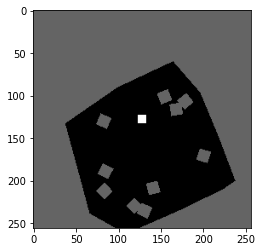

In [36]:
c = len(pix)//2
pix[c-5:c+5, c-5:c+5] = 255

plt.imshow(pix, cmap='gray')